In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

C:\Users\dongdai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [2]:
# create function check either a string contains number
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [3]:
year = []
folder_dir = "C:\\Users\\dongdai\\Desktop\\books\\单井日产量分析"
folder_year = os.listdir(folder_dir)
for y in folder_year:
    if hasNumbers(y):
        year.append(y)

In [4]:
year

['2014', '2015', '2016']

In [5]:
# set the dataframe that we collect data
data_table = pd.DataFrame(np.zeros((1200*len(year)+100,5)),columns = ['Year','Month','Date','Yesterday_produced','Today_produced'])

In [6]:
data_table.shape

(3700, 5)

In [8]:
y = years[1]

In [9]:
int(y) - int(min(years))

1

In [10]:
for y in years:
    folder_month = os.listdir(os.path.join(folder_dir,y))
    for m in folder_month:
        file_month = os.listdir(os.path.join(folder_dir,y,m))
        files_xls = [f for f in file_month if f[-3:] == 'xls']
        for xls in files_xls:
            path = os.path.join(folder_dir,y,m,xls)
            #print(path)
            month = int(re.findall(r'\d+', path)[2]) # 3 for date, 1 for month
            date = int(re.findall(r'\d+', path)[3])
            df = pd.read_excel(path, sheet_name='Sheet1')
            df.replace('NaN','NoRecords', inplace=True)
            row_index = (int(y)-int(min(year)))*1200 + month*100 + date
            data_table.iat[row_index,0] = y
            data_table.iat[row_index,1] = month
            data_table.iat[row_index,2] = date
            if df[(df.iloc[:,0]=="中1")].shape[0] == 1:
                data_table.iat[row_index,3] = df[(df.iloc[:,0]=="中1")].iloc[0,1]
                data_table.iat[row_index,4] = df[(df.iloc[:,0]=="中1")].iloc[0,2]
            else:
                data_table.iat[row_index,3] = 0
                data_table.iat[row_index,4] = 0 # 0 means no records in data

In [11]:
cleaned_data_table = data_table[data_table.Month > 0].reset_index(drop=True)

In [12]:
for i in np.arange(cleaned_data_table.shape[0]):
    if((cleaned_data_table.iloc[i,3] == 0) & (i<cleaned_data_table.shape[0])):
        j = i+1
        if cleaned_data_table.iloc[j,2] > 0:
            cleaned_data_table.iloc[i,3] = cleaned_data_table.iloc[j,2]

In [13]:
time_list = []
for i in np.arange(cleaned_data_table.shape[0]):
    t = str(int(cleaned_data_table.Year[i])) + "/" + str(int(cleaned_data_table.Month[i])) + "/" + str(int(cleaned_data_table.Date[i]))
    time_list.append(t)

In [14]:
cleaned_data_table['combined_date'] = pd.Series(time_list, index=cleaned_data_table.index)
cleaned_data_table['combined_date'] = pd.to_datetime(cleaned_data_table['combined_date'])

In [15]:
pd.set_option('display.max_rows', 1000)
cleaned_data_table.head(10)

,Year,Month,Date,Yesterday_produced,Today_produced,combined_date
0,2014.0,4.0,25.0,510.0,698.0,2014-04-25
1,2014.0,4.0,26.0,698.0,800.0,2014-04-26
2,2014.0,4.0,27.0,800.0,340.0,2014-04-27
3,2014.0,4.0,28.0,340.0,368.0,2014-04-28
4,2014.0,4.0,29.0,368.0,218.0,2014-04-29
5,2014.0,4.0,30.0,218.0,348.0,2014-04-30
6,2014.0,5.0,1.0,348.0,164.0,2014-05-01
7,2014.0,5.0,2.0,164.0,141.0,2014-05-02
8,2014.0,5.0,3.0,141.0,246.0,2014-05-03
9,2014.0,5.0,4.0,246.0,247.0,2014-05-04


In [16]:
cleaned_data_table[(cleaned_data_table.Today_produced < 50) | (cleaned_data_table.Today_produced.isnull())]

,Year,Month,Date,Yesterday_produced,Today_produced,combined_date
104,2014.0,8.0,7.0,8.0,0.0,2014-08-07
117,2014.0,8.0,20.0,21.0,0.0,2014-08-20
124,2014.0,8.0,27.0,377.0,NaN,2014-08-27
295,2015.0,2.0,16.0,17.0,0.0,2015-02-16
296,2015.0,2.0,17.0,18.0,0.0,2015-02-17
324,2015.0,3.0,17.0,18.0,0.0,2015-03-17
513,2015.0,9.0,22.0,23.0,0.0,2015-09-22
711,2016.0,4.0,7.0,8.0,0.0,2016-04-07


In [17]:
mess_index = cleaned_data_table[(cleaned_data_table.Today_produced < 50) | (cleaned_data_table.Today_produced.isnull())].index.tolist()

In [18]:
[x+1 for x in mess_index]

[105, 118, 125, 296, 297, 325, 514, 712]

In [19]:
review_ind = [x+1 for x in mess_index] + mess_index + [x-1 for x in mess_index]

In [20]:
sort_ind = sorted(list(set(review_ind)), key=int)

In [21]:
cleaned_data_table.iloc[sort_ind]

,Year,Month,Date,Yesterday_produced,Today_produced,combined_date
103,2014.0,8.0,6.0,188.0,254.0,2014-08-06
104,2014.0,8.0,7.0,8.0,0.0,2014-08-07
105,2014.0,8.0,8.0,153.0,208.0,2014-08-08
116,2014.0,8.0,19.0,190.0,234.0,2014-08-19
117,2014.0,8.0,20.0,21.0,0.0,2014-08-20
118,2014.0,8.0,21.0,479.0,556.0,2014-08-21
123,2014.0,8.0,26.0,481.0,377.0,2014-08-26
124,2014.0,8.0,27.0,377.0,NaN,2014-08-27
125,2014.0,8.0,28.0,389.0,385.0,2014-08-28
294,2015.0,2.0,15.0,1699.0,1748.0,2015-02-15


In [22]:
cleaned_data_table.Yesterday_produced[104+1]

153.0

In [23]:
for i in mess_index:
    if (cleaned_data_table.Yesterday_produced[i+1] > 50):
        cleaned_data_table.Today_produced[i] = cleaned_data_table.Yesterday_produced[i+1]

In [28]:
from plotly import version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(version)

trace = go.Scatter(
    x = cleaned_data_table['combined_date'][300:],
    y = cleaned_data_table['Today_produced'][300:], 
)


fig = {
    'data': [trace],
}

layout = go.Layout(
        yaxis=dict(
            range=[0, 800]
        )
    )

iplot(fig)

<module 'plotly.version' from 'C:\\Users\\dongdai\\Anaconda3\\lib\\site-packages\\plotly\\version.py'>


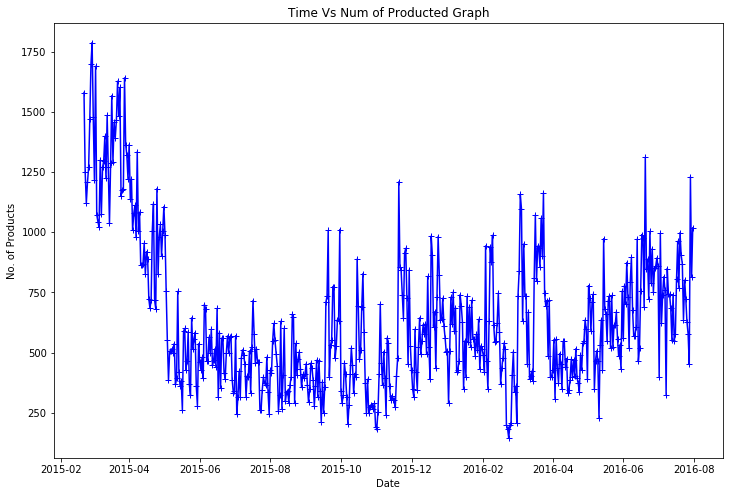

In [71]:
TITLE = 'Time Vs Num of Producted Graph'

X_AXIS_NAME = 'Date'
Y_AXIS_NAME = 'No. of Products'

time_stamp = cleaned_data_table.iloc[300:,5]

products = cleaned_data_table.iloc[300:,4]

plt.figure(figsize=(12,8))
#fig, ax = plt.subplots()
plt.plot(time_stamp, products,"b-+")
plt.xlabel(X_AXIS_NAME)
plt.ylabel(Y_AXIS_NAME)
plt.title(TITLE)
plt.show()

In [66]:
num_periods = 28
f_horizon = 1
TS = np.array(cleaned_data_table.Today_produced)

x_data = TS[:(len(TS) - (len(TS)%num_periods))]
x_batches = x_data.reshape(-1,28,1)

y_data = TS[1:(len(TS) - (len(TS)%num_periods)) + f_horizon]
y_batches = y_data.reshape(-1,28,1)
print(len(x_batches))
print(x_batches.shape)
#print(x_batches[0:2])

#print(y_batches[0:1])
print(y_batches.shape)

29
(29, 28, 1)
(29, 28, 1)


In [67]:
def test_data(series, forecast, num_preiods):
    test_x_setup = TS[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1,28,1)
    testY = TS[-(num_periods):].reshape(-1,28,1)
    return testX, testY

X_test, Y_test = test_data(TS, f_horizon, num_periods)
print(X_test.shape)
print(np.c_[X_test,Y_test])

(1, 28, 1)
[[[ 995.  622.]
  [ 622.  741.]
  [ 741.  815.]
  [ 815.  761.]
  [ 761.  325.]
  [ 325.  849.]
  [ 849.  742.]
  [ 742.  742.]
  [ 742.  683.]
  [ 683.  551.]
  [ 551.  740.]
  [ 740.  549.]
  [ 549.  579.]
  [ 579.  804.]
  [ 804.  962.]
  [ 962.  770.]
  [ 770.  998.]
  [ 998.  904.]
  [ 904.  869.]
  [ 869.  637.]
  [ 637.  801.]
  [ 801.  724.]
  [ 724.  627.]
  [ 627.  578.]
  [ 578.  451.]
  [ 451. 1230.]
  [1230.  813.]
  [ 813. 1018.]]]


In [68]:
tf.reset_default_graph()

num_periods = 28
inputs = 1
hidden = 200
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

LSTM_cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(LSTM_cell, X, dtype=tf.float32)

learning_rate = 0.005

stacked_rnn_output = tf.reshape(rnn_output, [-1,hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [69]:
epochs = 5000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep%100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)
            
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred)
    
    # epochs = 5000, learning_rate = 0.005, MSE = 27053850

0 	MSE: 562067500.0
100 	MSE: 101496770.0
200 	MSE: 59195788.0
300 	MSE: 47426000.0
400 	MSE: 40648016.0
500 	MSE: 36993480.0
600 	MSE: 35009704.0
700 	MSE: 33748716.0
800 	MSE: 32863770.0
900 	MSE: 32189788.0
1000 	MSE: 30972254.0
1100 	MSE: 30260302.0
1200 	MSE: 29713220.0
1300 	MSE: 29250220.0
1400 	MSE: 28866852.0
1500 	MSE: 28518890.0
1600 	MSE: 28178184.0
1700 	MSE: 27829972.0
1800 	MSE: 40431920.0
1900 	MSE: 33497374.0
2000 	MSE: 32464912.0
2100 	MSE: 31955238.0
2200 	MSE: 31526650.0
2300 	MSE: 31164396.0
2400 	MSE: 30840992.0
2500 	MSE: 30537638.0
2600 	MSE: 30274138.0
2700 	MSE: 29951614.0
2800 	MSE: 29708236.0
2900 	MSE: 29447926.0
3000 	MSE: 28993002.0
3100 	MSE: 29006668.0
3200 	MSE: 28859052.0
3300 	MSE: 28739092.0
3400 	MSE: 28627260.0
3500 	MSE: 28515960.0
3600 	MSE: 28404700.0
3700 	MSE: 28297460.0
3800 	MSE: 28186728.0
3900 	MSE: 27815484.0
4000 	MSE: 27674044.0
4100 	MSE: 27506448.0
4200 	MSE: 27357240.0
4300 	MSE: 27242028.0
4400 	MSE: 27115604.0
4500 	MSE: 26999404.

Text(0.5,0,'Time Periods')

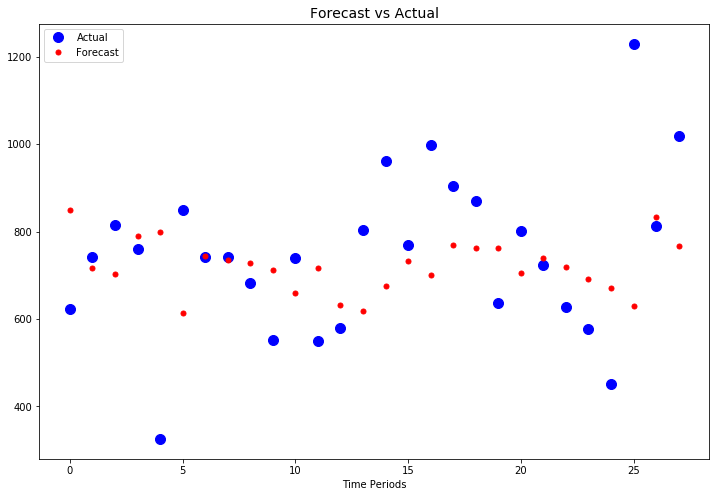

In [70]:
plt.figure(figsize=(12,8))
plt.title("Forecast vs Actual", fontsize = 14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_pred)), "r.",markersize = 10, label='Forecast')
plt.legend(loc = 'upper left')
plt.xlabel("Time Periods")